# 1. Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Definições

In [12]:
IMAGES_PATH = "../reports/figures/"
PATH_INPUT_DATASET = "../data/processed/internacoes_processado.csv"
PATH_BEST_MODELS = "./models/best_models.pkl"

style_dict = {
    "axes.spines.right": False,
    "axes.spines.top": False,
    "axes.titlesize": "large",
    'text.color': '.25',
}

sns.set_theme(
    context="paper",
    style="ticks",
    palette="pastel",
    rc=style_dict
)

# 3. Funções de apoio

In [13]:
def salvar_figura(fig, fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH + f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    print(f'Salvando figura {fig_id}...')
    fig.savefig(path, format=fig_extension, dpi=resolution)

def obter_nomes_colunas_por_tipo(df, numeric=False):
    if numeric:
        return list(df.select_dtypes(include=['int64', 'float64']).columns)
    else:
        return list(df.select_dtypes(include=['object']).columns)

def plotar_features_categoricas(df, target_column, categorical_features):
    for feature in categorical_features:
        sns.countplot(x=feature, data=df, hue=target_column)
        plt.show()
        plt.clf()
    plt.tight_layout()

def melt_results_df(results_df):
    df = pd.melt(results_df, id_vars="Model", value_vars=results_df.columns[1:])
    
    df['Validacao'] = df['variable'].map(validacao_metrica_mapping)
    df['Metrica'] = df['variable'].str.split('_').str[0]
    df['Valor'] = df['value']

    df = df.drop(columns=['variable', 'value'])

    return df
    

Salvando figura funcao-logistica...


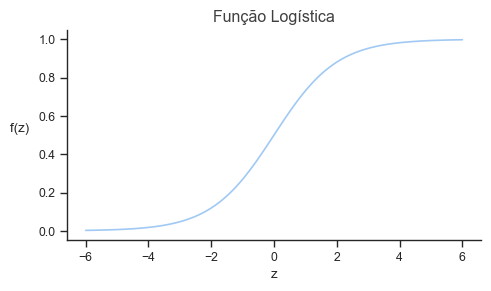

In [31]:
fig, ax = plt.subplots(figsize=(5,3))

def logistic_regression(x):
    return 1 / (1 + np.exp(-x))

# Gerando valores para o eixo x
x_values = np.linspace(-6, 6, 100)  # Valores de -6 a 6 para o eixo x

# Calculando os valores correspondentes no eixo y usando a função de regressão logística
y_values = logistic_regression(x_values)

ax.plot(x_values, y_values, label='Regressão Logística')
ax.set_title('Função Logística')
ax.set_xlabel('z')
ax.set_ylabel('f(z)       ', rotation=0);
salvar_figura(fig, 'funcao-logistica')